In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv("/content/Bank Target Marketing Dataset.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
56369,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
56370,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
56371,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
rows, coloumns = data.shape
print ('number of records:', rows)
print ('number of features:', coloumns)

number of records: 56373
number of features: 17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


In [ ]:
# removing duplicate values
print(f'Size of the set before eliminate the repeated rows: {data.shape}')
data.drop_duplicates(inplace=True)

print(f'Size of the set after eliminate the repeated rows: {data.shape}')

Size of the set before eliminate the repeated rows: (56373, 17)
Size of the set after eliminate the repeated rows: (45211, 17)


In [ ]:
# dropping columns  df = df.drop(columns="day",axis=1) #day, month, duration
# explaining column type of values job -good bad middle


In [ ]:
data["job"].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [ ]:
data["marital"].value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


In [ ]:
data["education"].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [ ]:
data["contact"].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


In [ ]:
data["month"].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


In [ ]:
data["poutcome"].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


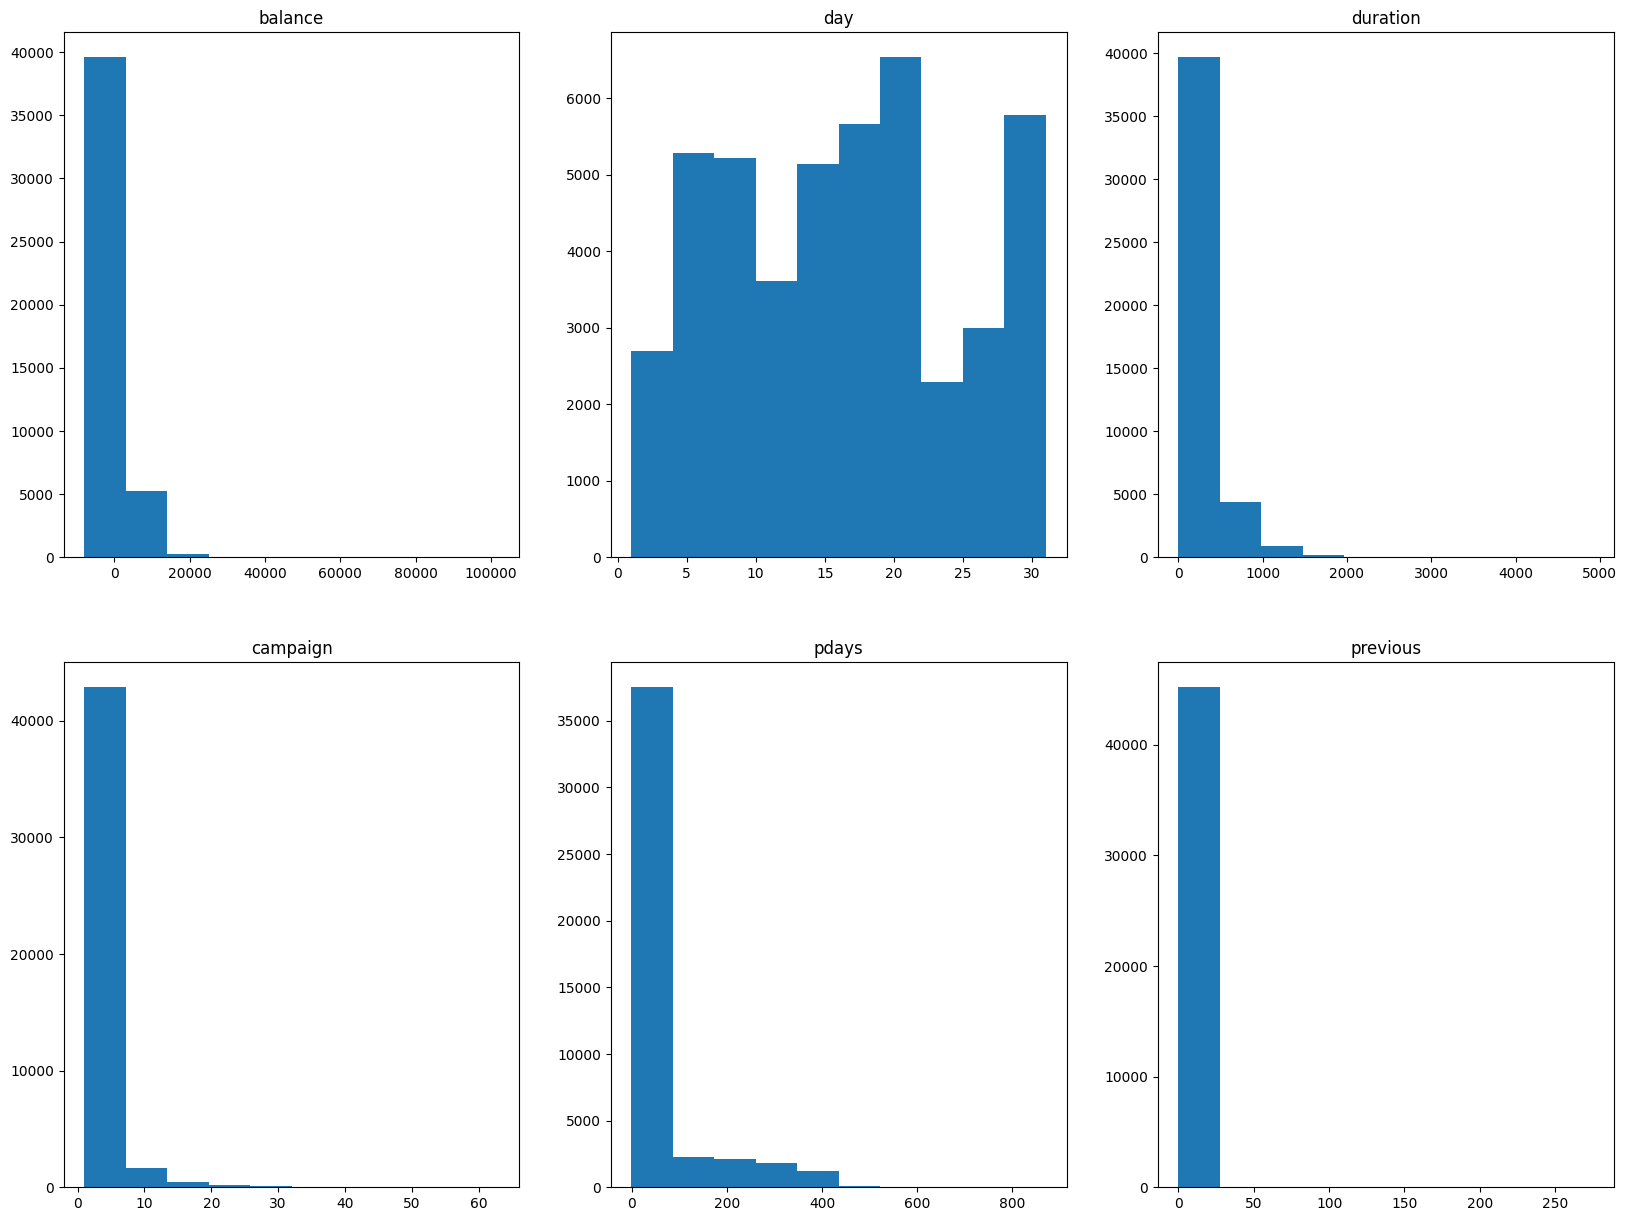

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(data[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

In [ ]:
data[['balance','day','duration','pdays', 'campaign', 'previous']].describe()

,balance,day,duration,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,40.197828,2.763841,0.580323
std,3044.765829,8.322476,257.527812,100.128746,3.098021,2.303441
min,-8019.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,72.000000,8.000000,103.000000,-1.000000,1.000000,0.000000
50%,448.000000,16.000000,180.000000,-1.000000,2.000000,0.000000
75%,1428.000000,21.000000,319.000000,-1.000000,3.000000,0.000000
max,102127.000000,31.000000,4918.000000,871.000000,63.000000,275.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Apply Label Encoding to categorical columns
data['deposit'] = labelencoder.fit_transform(data['deposit'])   # 1 is yes/0 is no
data['default'] = labelencoder.fit_transform(data['default'])   # yes/no
data['housing'] = labelencoder.fit_transform(data['housing'])   # yes/no
data['loan'] = labelencoder.fit_transform(data['loan'])         # yes/no
data['contact'] = labelencoder.fit_transform(data['contact'])   # 3 contact types

data['job'] = labelencoder.fit_transform(data['job'])   # 12 jobs
data['marital'] = labelencoder.fit_transform(data['marital'])   # 3 marital
data['education'] = labelencoder.fit_transform(data['education'])   # 4 education
data['month'] = labelencoder.fit_transform(data['month'])         # 12 months
data['poutcome'] = labelencoder.fit_transform(data['poutcome']) #4 types
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56356,59,4,1,2,0,138,1,1,0,16,9,162,2,187,5,0,0
56360,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
56361,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
56371,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
data.shape

(45211, 17)

In [ ]:
#finding missing values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


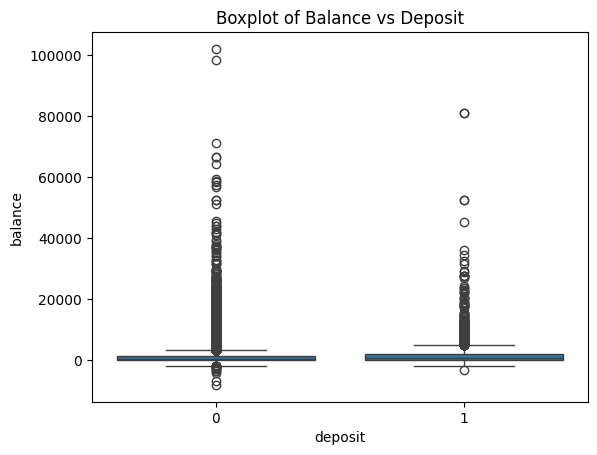

In [ ]:
#finding outliers
sns.boxplot(x="deposit", y="balance", data=data)
plt.title("Boxplot of Balance vs Deposit")
plt.show()

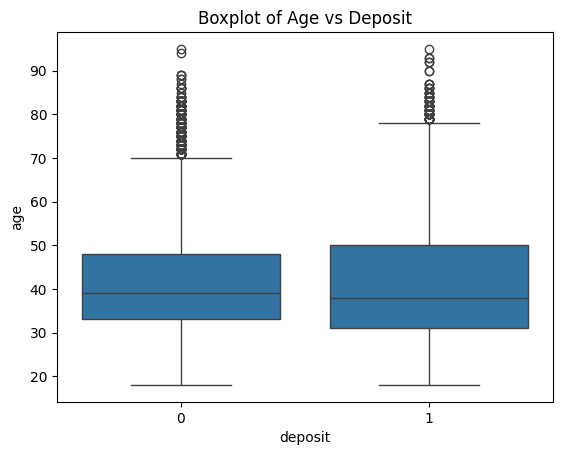

In [ ]:
sns.boxplot(x="deposit", y="age", data=data)
plt.title("Boxplot of Age vs Deposit")
plt.show()

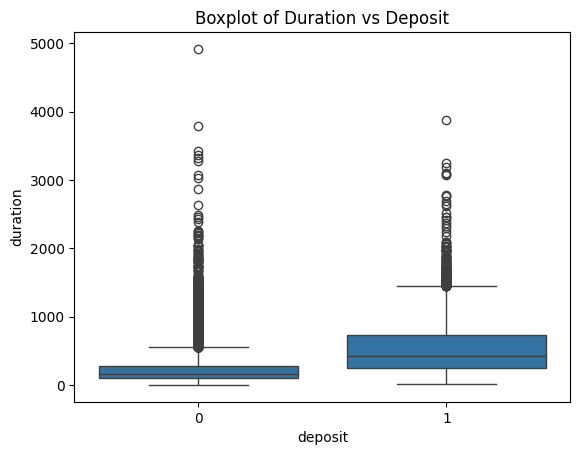

In [ ]:
sns.boxplot(x="deposit", y="duration", data=data)
plt.title("Boxplot of Duration vs Deposit")
plt.show()

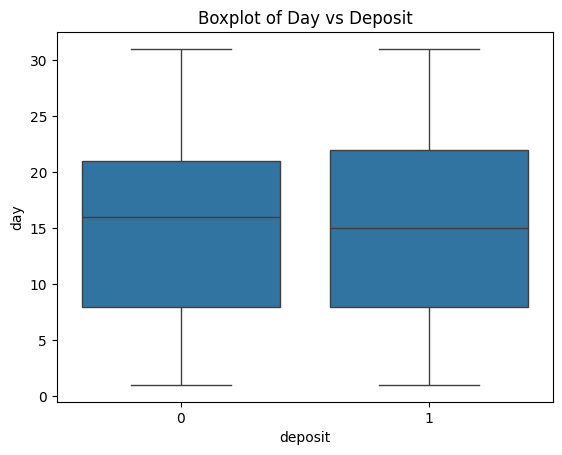

In [ ]:
sns.boxplot(x="deposit", y="day", data=data)
plt.title("Boxplot of Day vs Deposit")
plt.show()

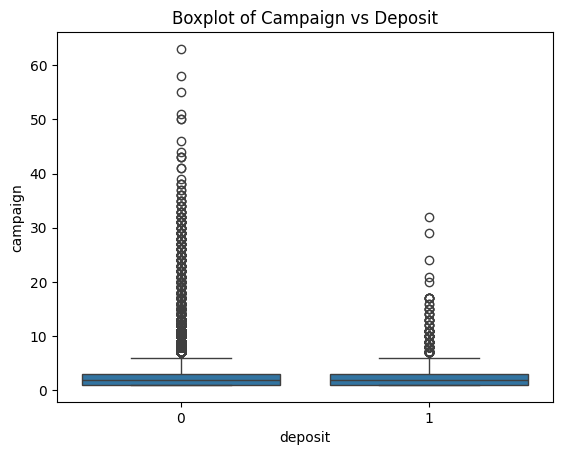

In [ ]:
sns.boxplot(x="deposit", y="campaign", data=data)
plt.title("Boxplot of Campaign vs Deposit")
plt.show()

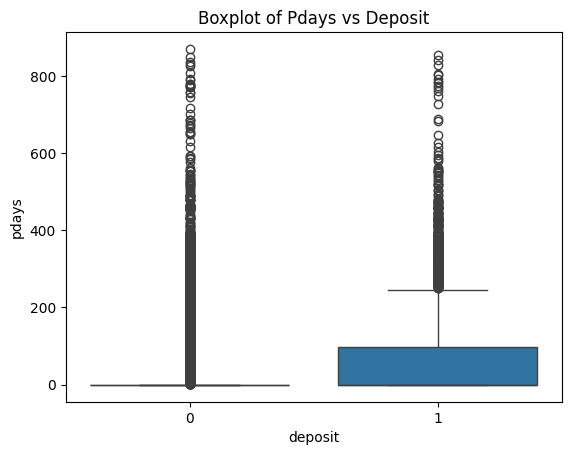

In [ ]:
sns.boxplot(x="deposit", y="pdays", data=data)
plt.title("Boxplot of Pdays vs Deposit")
plt.show()

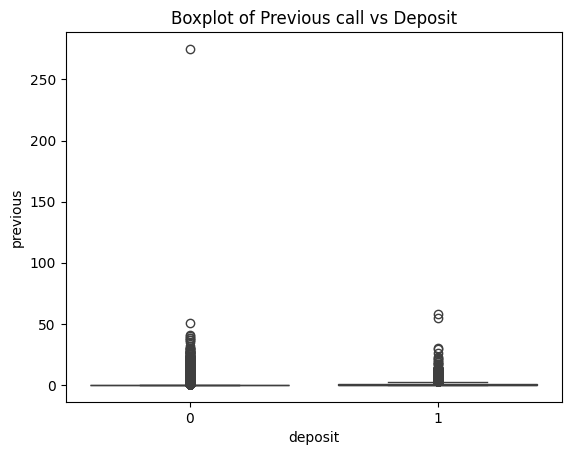

In [ ]:
sns.boxplot(x="deposit", y="previous", data=data)
plt.title("Boxplot of Previous call vs Deposit")
plt.show()

In [ ]:
dataset1 = data[data['age']<=80]
dataset1["age"].value_counts()
#print(f'Dataset size after eliminate the rows of age : {data.shape}')

,count
age,
32,2085
31,1996
33,1972
34,1930
35,1894
...,...
76,32
80,31
78,30


In [ ]:
dataset1 = dataset1[(dataset1['duration'] > 0) & (dataset1['duration'] <= 3000)]
dataset1["duration"].value_counts()

,count
duration,
124,188
90,184
89,176
104,175
122,175
...,...
1352,1
1262,1
1061,1


In [ ]:
dataset1 = data[data['balance']<=65000]
dataset1["balance"].value_counts()

,count
balance,
0,3514
1,195
2,156
4,139
3,134
...,...
-572,1
3277,1
-1019,1


In [ ]:

dataset1['pdays'] = dataset1['pdays'].replace(-1, 0)

dataset1['pdays'][dataset1['pdays'] == -1] = 0


In [ ]:
dataset1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56356,59,4,1,2,0,138,1,1,0,16,9,162,2,187,5,0,0
56360,37,4,1,2,0,1428,0,0,0,16,9,333,2,0,0,3,0
56361,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
56371,57,1,1,1,0,668,0,0,1,17,9,508,4,0,0,3,0


In [ ]:
dataset1.shape

(45204, 17)

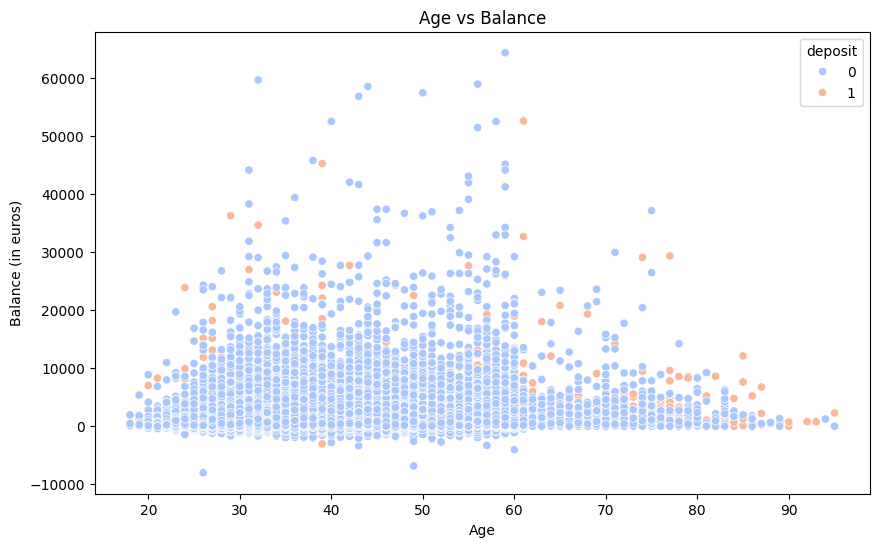

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=dataset1, hue='deposit', palette='coolwarm')
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance (in euros)')
plt.show()

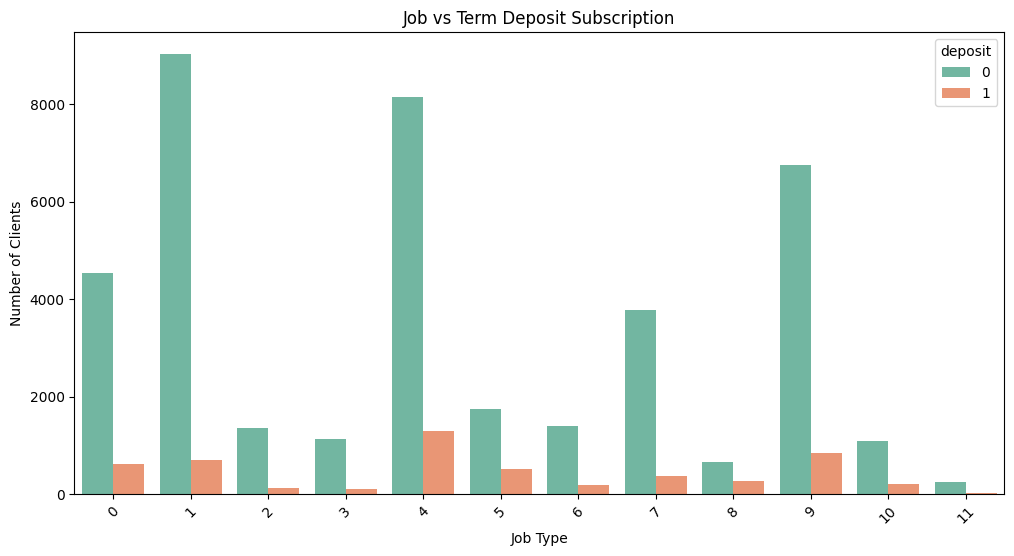

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=dataset1, palette='Set2')
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()


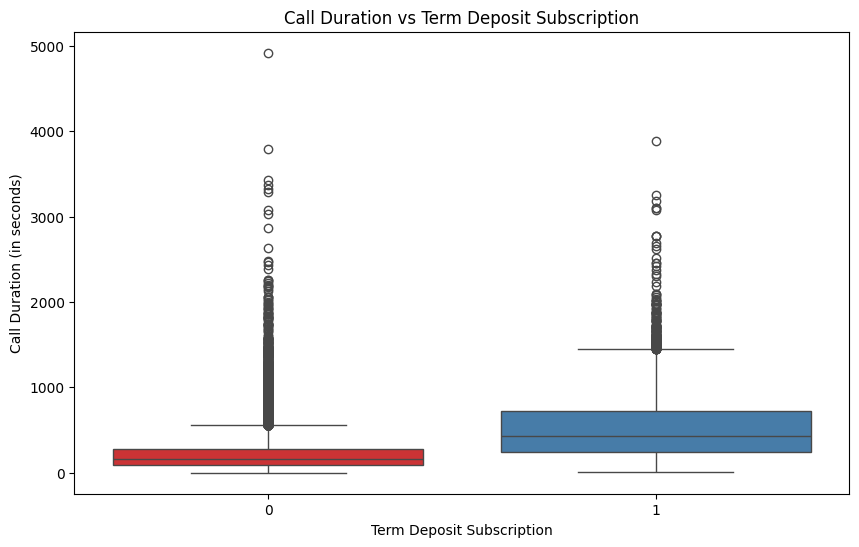

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='duration', data=dataset1, palette='Set1')
plt.title('Call Duration vs Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Call Duration (in seconds)')
plt.show()


EDA

In [ ]:
dataset1["deposit"].value_counts()

,count
deposit,
0,39917
1,5287


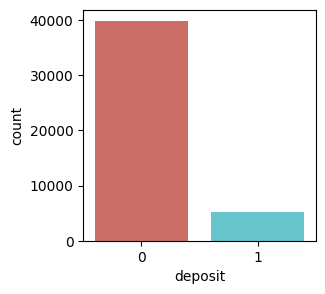

<Figure size 640x480 with 0 Axes>

In [ ]:
# class distribution
plt.figure(figsize=(3,3))
dataset1['deposit'].value_counts()
sns.countplot(x='deposit', data=dataset1, palette='hls')
plt.show()
plt.savefig('deposit')

In [ ]:
# Variable assingment
X = dataset1.drop('deposit', axis=1)
y = dataset1['deposit']

Counter({1: 39917, 0: 39917})


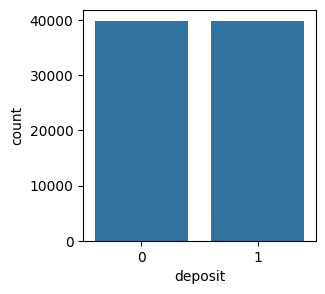

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(3,3))
sns.countplot(x=y_b)
print(Counter(y_b))

In [ ]:
X_b.shape

(79834, 16)

In [ ]:
y.head(4)

,deposit
0,1
1,1
2,1
3,1


In [ ]:
#Model 1: Gaussian Naive Bayes

In [ ]:
# Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.20, random_state = 0)

In [ ]:
X_test[0:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
59358,47,0,0,1,0,352,0,0,0,21,1,161,1,449,1,1
32648,34,4,0,2,0,13204,1,1,0,20,9,197,2,0,0,3
48832,33,8,1,1,0,1099,0,0,0,8,9,191,1,0,0,3
66483,47,6,1,1,0,4039,0,0,0,9,1,459,1,116,3,2
40506,40,7,0,1,0,209,1,0,0,12,8,302,2,344,3,1


In [ ]:
y_test[0:5]

,deposit
59358,1
32648,0
48832,1
66483,1
40506,0


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_p = gnb.predict(X_test)

acc = accuracy_score(y_test, y_p) * 100
print("GaussianNB - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_p))

GaussianNB - Accuracy: 77.347.

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      7897
           1       0.71      0.93      0.81      8070

    accuracy                           0.77     15967
   macro avg       0.80      0.77      0.77     15967
weighted avg       0.80      0.77      0.77     15967



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_p)
print(cm)

[[4867 3030]
 [ 587 7483]]


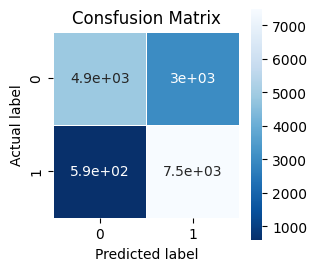

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.title("Consfusion Matrix", size = 12);

In [ ]:
##Model 2: Logistic Regression

In [ ]:
print(X_b.columns)
print(X_b.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
(79834, 16)


In [ ]:
print(y_b.shape)

(79834,)


In [ ]:
#OLS Regression Results**
import statsmodels.api as sm
X2 = sm.add_constant(X_b)
est = sm.OLS(y_b, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                deposit   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     4236.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:45:24   Log-Likelihood:                -33404.
No. Observations:               79834   AIC:                         6.684e+04
Df Residuals:                   79817   BIC:                         6.700e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8082      0.011     72.770      0.0

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 5, step = 1)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False  True  True  True False False False
 False False False False]
[ 9  7  1  2  1 12  1  1  1  8  5 10  3 11  4  6]


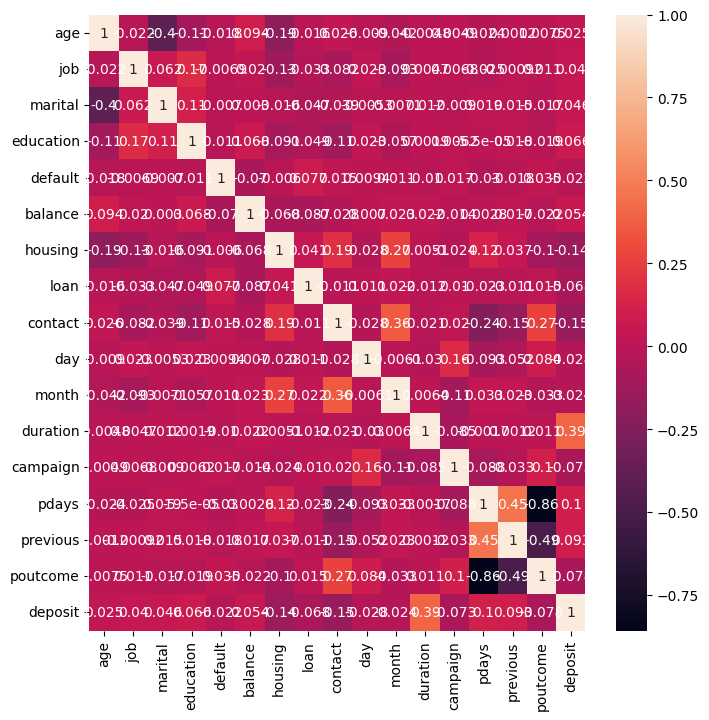

In [ ]:
sns.heatmap(dataset1.corr(), annot = True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import arange

model_LR = LogisticRegression()
print(model_LR.get_params())

parameters = dict()
parameters['random_state'] = arange(0, 100, 1)
parameters['C'] = arange(0.0001, 10, 10)
parameters['solver'] = ['liblinear', 'newton-cg', 'lbfgs', 'saga']
parameters['penalty'] = ['l1', 'l2']
parameters['multi_class'] = ['auto', 'ovr', 'multinomial']

## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR = GridSearchCV(estimator=model_LR, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_
best_score_LR = grid_search_LR.best_score_
print()
print(best_parameters_LR)
print(best_score_LR)

y_pred_1 = grid_search_LR.predict(X_test)

# Get the accuracy score
lr_acc = accuracy_score(y_test, y_pred_1)
lr_pre = precision_score(y_test, y_pred_1, average='micro')
lr_recall = recall_score(y_test, y_pred_1, average='micro')
lr_f1 = f1_score(y_test, y_pred_1, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
print("LR - Precision: {:.3f}.".format(lr_pre))
print("LR - Recall: {:.3f}.".format(lr_recall))
print("LR - F1 Score: {:.3f}.".format(lr_f1))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred_1))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 0.0001, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.8122348212517864

LR - Accuracy: 0.815.
LR - Precision: 0.815.
LR - Recall: 0.815.
LR - F1 Score: 0.815.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      7897
           1       0.82      0.81      0.81      8070

    accuracy                           0.81     15967
   macro avg       0.81      0.81      0.81     15967
weighted avg       0.81      0.81      0.81     15967



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)


[[6504 1393]
 [1566 6504]]


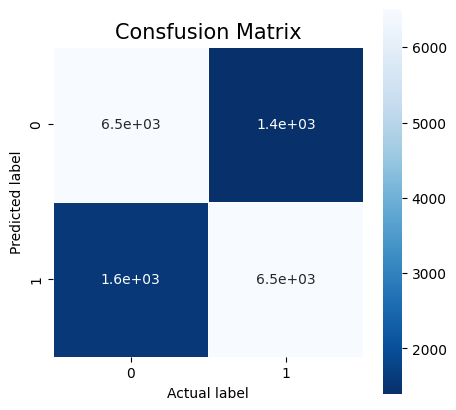

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);

In [ ]:
#ROC curve

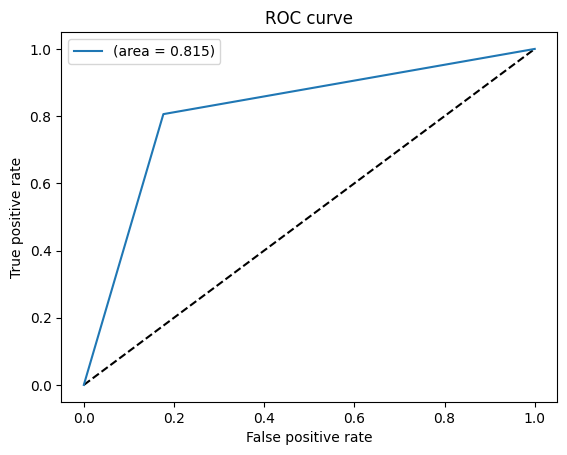

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc (fpr, tpr, threshold):
    auc = roc_auc_score(y_test, y_pred_1)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plot_roc(fpr, tpr, thresholds)

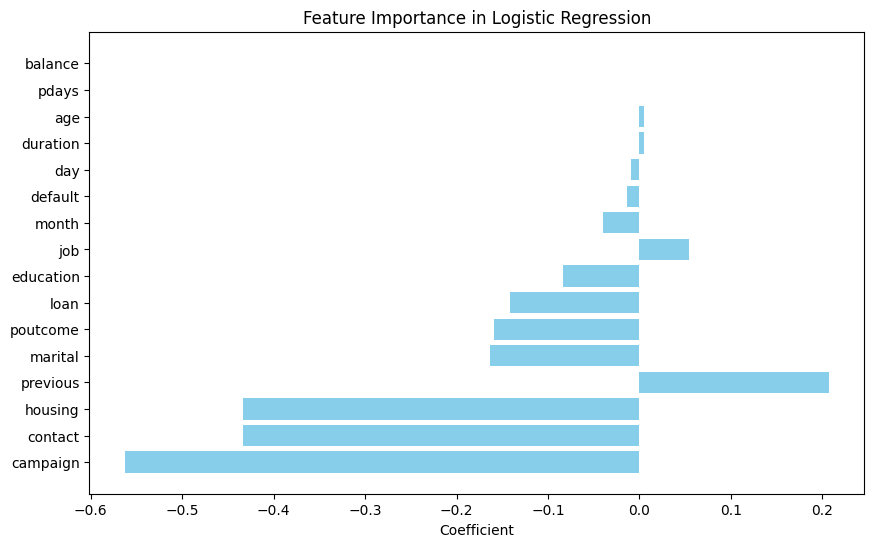

In [ ]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_b.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient')
plt.show()

In [ ]:
##Model 3: Random Forest Model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_b, y_b, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)



# Cross-Validation
cross_val_scores = cross_val_score(rf_model, X_train2, y_train2, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean CV Score: {np.mean(cross_val_scores)}")



#Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train2, y_train2)
best_rf_model = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")



# Make predictions on the test data
y_pred2 = best_rf_model.predict(X_test2)



# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for detailed performance
print(classification_report(y_test2, y_pred2))


Cross-Validation Scores: [0.92594332 0.92891811 0.92562436 0.92867768 0.92578094]
Mean CV Score: 0.9269888849692745
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 94.06%
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8029
           1       0.93      0.96      0.94      7938

    accuracy                           0.94     15967
   macro avg       0.94      0.94      0.94     15967
weighted avg       0.94      0.94      0.94     15967



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)


[[7431  598]
 [ 350 7588]]


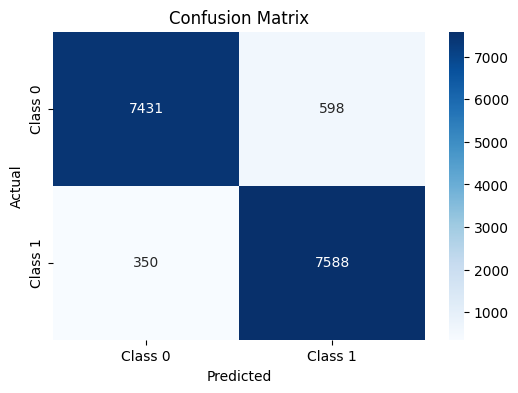

In [ ]:
# Plot confusion matrix
class_names = ['Class 0', 'Class 1']
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

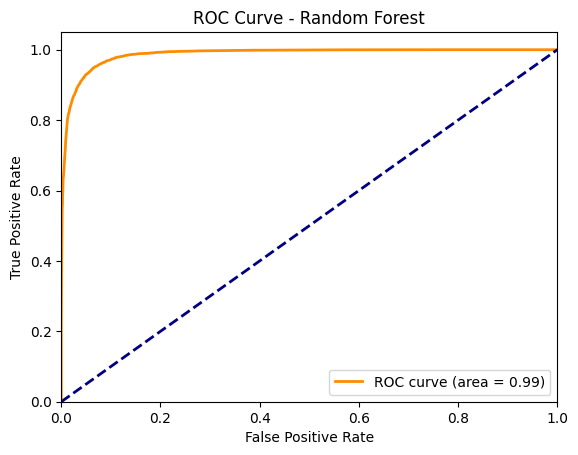

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_rf = best_rf_model.predict_proba(X_test2)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test2, y_pred_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Feature Importance Ranking:
1. Feature 11 (0.31594569481923634)
2. Feature 6 (0.10619514762192987)
3. Feature 8 (0.08342032890393791)
4. Feature 10 (0.07511144613801607)
5. Feature 5 (0.06805827519987111)
6. Feature 9 (0.06165868768968803)
7. Feature 0 (0.05272650224722993)
8. Feature 1 (0.04625092473883667)
9. Feature 12 (0.03810722127394162)
10. Feature 7 (0.03661453245439237)
11. Feature 13 (0.03410668754620897)
12. Feature 15 (0.029848487689521395)
13. Feature 3 (0.019891500960501678)
14. Feature 2 (0.01551082671338802)
15. Feature 14 (0.015395643928839466)
16. Feature 4 (0.0011580920744605559)


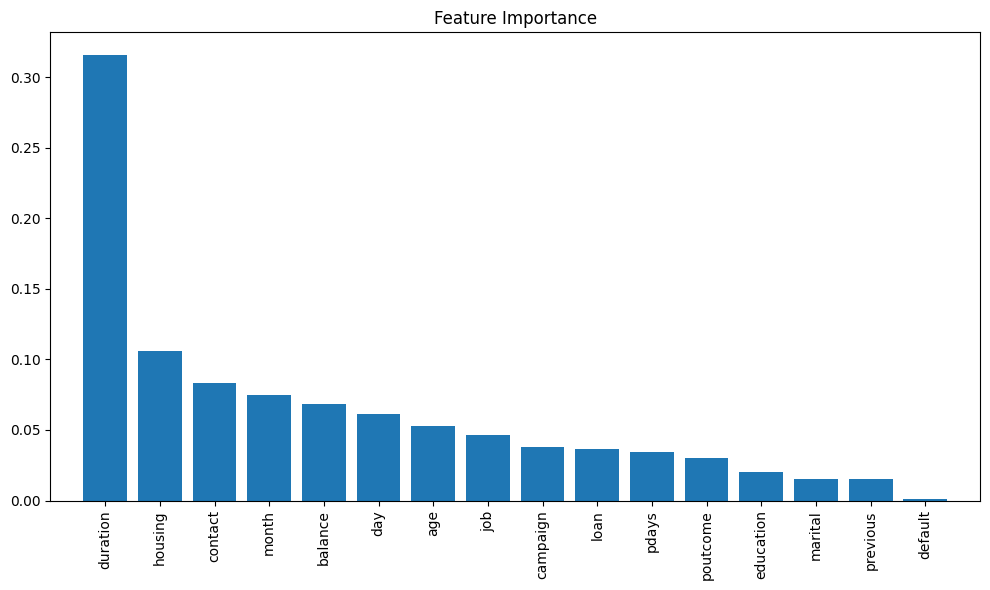

In [ ]:
#Feature Importance Analysis
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importance Ranking:")
for i in range(X_train2.shape[1]):
    print(f"{i + 1}. Feature {indices[i]} ({importances[indices[i]]})")

# Plotting feature importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train2.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train2.shape[1]), [X_train2.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train2.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
#Model 4 Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have X (features) and y (target)
X_tra, X_tes, y_tra, y_tes = train_test_split(X_b, y_b, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
parameters = {
    'max_features': ['log2', 'sqrt', 'auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10, 50],
    'min_samples_split': [2, 3, 50, 100],
    'min_samples_leaf': [1, 5, 8, 10]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Set up Grid Search with cross-validation (cv=5)
grid_search_dt = GridSearchCV(dt, parameters, scoring='accuracy', cv=5)

# Fit the model with the training data
grid_search_dt.fit(X_tra, y_tra)

# Extract the best parameters and the best score
best_parameters_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters:", best_parameters_dt)
print("Best Cross-Validation Accuracy:", round(best_score_dt, 2))


Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Cross-Validation Accuracy: 0.88


In [ ]:
# Initialize the Decision Tree classifier with the best parameters
dt_best = DecisionTreeClassifier(**best_parameters_dt)

# Train the model on the full training set
dt_best.fit(X_tra, y_tra)

# Predict using the test data
y_pred_best = dt_best.predict(X_tes)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Model Accuracy
accuracy = accuracy_score(y_tes, y_pred_best)
print("Accuracy:", round(accuracy, 2))

# Classification Report
print("\nClassification Report:\n", classification_report(y_tes, y_pred_best))


Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12017
           1       0.88      0.88      0.88     11934

    accuracy                           0.88     23951
   macro avg       0.88      0.88      0.88     23951
weighted avg       0.88      0.88      0.88     23951



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_tes, y_pred_best)
print("\nConfusion Matrix:\n", conf_matrix)




Confusion Matrix:
 [[10625  1392]
 [ 1432 10502]]


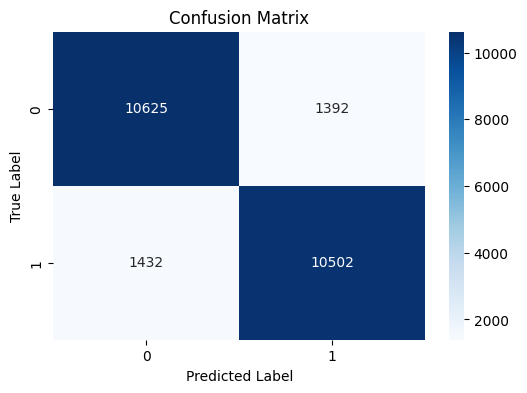

In [ ]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

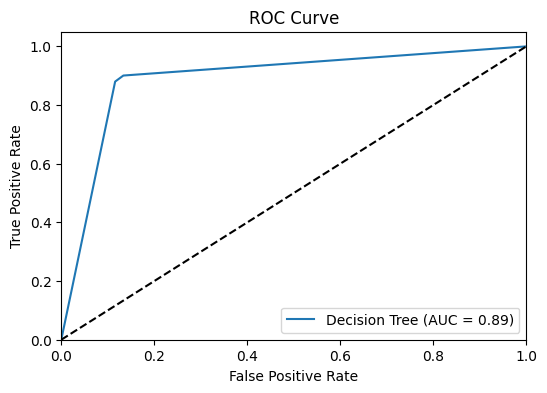

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1
y_probs_best = dt_best.predict_proba(X_tes)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_tes, y_probs_best)
roc_auc = roc_auc_score(y_tes, y_probs_best)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
